# CAPSTONE PROJECT ON EMOTION DETECTION

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pathlib

from sklearn.preprocessing import StandardScaler

import cv2
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten,BatchNormalization
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import ImageDataGenerator

# Load the dataset

In [3]:
train_data_dir = pathlib.Path("C:/Users/Lenovo/Desktop/facial expression/Train")
print(train_data_dir)

test_data_dir = pathlib.Path("C:/Users/Lenovo/Desktop/facial expression/Validation")
print(test_data_dir)

C:\Users\Lenovo\Desktop\facial expression\Train
C:\Users\Lenovo\Desktop\facial expression\Validation


In [ ]:
train_data_dir('angry',)

In [4]:
#  Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(    
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.3,
)

validation_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'C:/Users/Lenovo/Desktop/facial expression/Train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'C:/Users/Lenovo/Desktop/facial expression/Validation',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Build convolutional neural network

In [5]:
# create model structure
emotion_model = Sequential([
    #block-1
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    #block-2
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    #block-3
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    #block-4
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    #block-5
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

emotion_model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001,epsilon=1e-06),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

emotion_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                    

In [6]:
# Train the neural network/model
emotion_model_info = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/30
448/448 [==============================] - 344s 761ms/step - loss: 1.8275 - accuracy: 0.2453 - val_loss: 1.8109 - val_accuracy: 0.2583
Epoch 2/30
448/448 [==============================] - 315s 702ms/step - loss: 1.7980 - accuracy: 0.2487
Epoch 3/30
448/448 [==============================] - 303s 675ms/step - loss: 1.7279 - accuracy: 0.2934
Epoch 4/30
448/448 [==============================] - 214s 477ms/step - loss: 1.6578 - accuracy: 0.3374
Epoch 5/30
448/448 [==============================] - 226s 504ms/step - loss: 1.6025 - accuracy: 0.3670
Epoch 6/30
448/448 [==============================] - 6079s 14s/step - loss: 1.5577 - accuracy: 0.3916
Epoch 7/30
448/448 [==============================] - 241s 538ms/step - loss: 1.5255 - accuracy: 0.4065
Epoch 8/30
448/448 [==============================] - 244s 545ms/step - loss: 1.4914 - accuracy: 0.4223
Epoch 9/30
448/448 [==============================] - 227s 507ms/step - loss: 1.4547 - accuracy: 0.4396
Epoch 10/30
448/448 [==

# Visualize Training Performance

In [8]:
print(emotion_model_info.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


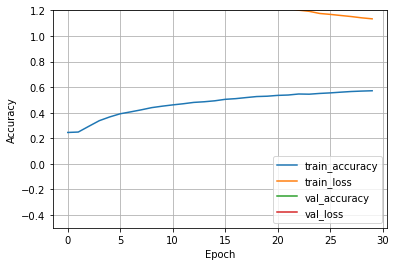

In [9]:
import matplotlib.pyplot as plt
plt.grid()
plt.plot(emotion_model_info.history['accuracy'], label='train_accuracy')
plt.plot(emotion_model_info.history['loss'], label = 'train_loss')
plt.plot(emotion_model_info.history['val_accuracy'], label='val_accuracy')
plt.plot(emotion_model_info.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.5, 1.2])
plt.legend(loc='lower right')
plt.show()

# Saving the model

In [10]:
emotion_model.save('facial_emotions_model.h5')

# Test/Predict Image

(48, 48, 1)


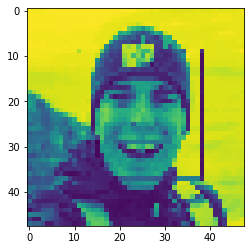

In [11]:
from tensorflow.keras.preprocessing import image
img_path='C:/Users/Lenovo/Desktop/facial expression/prediction/happy.jpeg'
test_image=image.load_img(img_path,target_size=(48,48),color_mode='grayscale')
test_image=image.img_to_array(test_image)
print(test_image.shape)
plt.imshow(test_image)
plt.show()

In [13]:
test_image=test_image.reshape(1,48,48,1)
classes=['Angry','disgust','Fear','Happy','neutral','sad','surprise']
result=emotion_model.predict(test_image)
print(result[0])
y_pred=np.argmax(result[0])
print('The person facial emotion is:',classes[y_pred])

1/1 [==============================] - 0s 186ms/step
[0. 0. 1. 0. 0. 0. 0.]
The person facial emotion is: Fear
